### **Data Download**

Kaggle setup

In [20]:
import os
import json

# Load the Kaggle API token from the kaggle.json file
with open('kaggle.json', 'r') as f:
    kaggle_token = json.load(f)

# Set the Kaggle API credentials as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_token['username']
os.environ['KAGGLE_KEY'] = kaggle_token['key']

Downloading the UPenn and Mayo Clinic's Seizure Detection Challenge Data from Kaggle

In [19]:
!kaggle competitions download -c seizure-detection --force


  0%|          | 0.00/10.1G [00:00<?, ?B/s]
  0%|          | 1.00M/10.1G [00:01<5:32:40, 544kB/s]
  0%|          | 2.00M/10.1G [00:02<2:44:58, 1.10MB/s]
  0%|          | 3.00M/10.1G [00:02<1:42:17, 1.77MB/s]
  0%|          | 4.00M/10.1G [00:02<1:18:09, 2.31MB/s]
  0%|          | 5.00M/10.1G [00:02<1:00:19, 3.00MB/s]
  0%|          | 6.00M/10.1G [00:03<54:28, 3.32MB/s]  
  0%|          | 8.00M/10.1G [00:03<36:00, 5.02MB/s]
  0%|          | 9.00M/10.1G [00:03<39:13, 4.61MB/s]
  0%|          | 10.0M/10.1G [00:03<34:21, 5.26MB/s]
  0%|          | 11.0M/10.1G [00:03<32:14, 5.60MB/s]
  0%|          | 12.0M/10.1G [00:04<34:43, 5.20MB/s]
  0%|          | 13.0M/10.1G [00:04<32:13, 5.60MB/s]
  0%|          | 14.0M/10.1G [00:04<34:43, 5.20MB/s]
  0%|          | 15.0M/10.1G [00:04<44:37, 4.05MB/s]
  0%|          | 17.0M/10.1G [00:04<30:04, 6.00MB/s]
  0%|          | 18.0M/10.1G [00:05<29:25, 6.13MB/s]
  0%|          | 19.0M/10.1G [00:05<32:32, 5.55MB/s]
  0%|          | 20.0M/10.1G [00:05<30:16, 

Unzipping the data

In [22]:
import zipfile

# Path to the zip file
zip_file_path = 'seizure-detection.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('seizure_detection_data')

print("Unzipping completed.")

Unzipping completed.


Unzipping the dataset

In [1]:
import os
import tarfile
import time

start_time = time.time()

file_path = 'seizure_detection_data/clips.tar.gz'

extract_path = './'

with tarfile.open(file_path, 'r:gz') as tar_ref:
    tar_ref.extractall(extract_path)

end_time = time.time()
print(f"Execution Time: {end_time - start_time:.2f} seconds")

C:\Users\HP\AppData\Local\Temp\ipykernel_14176\2463822461.py:12: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar_ref.extractall(extract_path)


Execution Time: 1124.71 seconds


The files are matlab files that can be loaded in using a function from scipy

Loading Patient 2 data

In [2]:
upenn_ictal_list = []
upenn_interictal_list = []

# Use the python os module instead of a shell command to get the file list
import os
UPENN_P1_DATA_DIR = os.listdir('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/')
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if 'interictal' in file: # Use the 'in' operator to check if substring is present
    upenn_interictal_list.append(file)
  elif 'ictal' in file:
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

# Construct the full file path
upenn_seizure_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/' + upenn_seizure_file
upenn_baseline_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/' + upenn_baseline_file
from scipy.io import loadmat

# Load the .mat file using the full file path
mat = loadmat(upenn_seizure_file_path)
mat
mat = loadmat(upenn_baseline_file_path)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: unix, Software: R v3.0.2, Created on: Mon Apr  7 23:13:44 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[-26.221 , -26.221 , -26.221 , ..., -58.221 , -58.221 , -58.221 ],
        [-52.1714, -52.1714, -52.1714, ..., -42.1714, -43.1714, -44.1714],
        [-43.4448, -44.4448, -44.4448, ..., -39.4448, -38.4448, -38.4448],
        ...,
        [ 54.4486,  54.4486,  53.4486, ...,   3.4486,   3.4486,   3.4486],
        [ 70.3006,  69.3006,  69.3006, ...,  -0.6994,  -1.6994,  -2.6994],
        [ 46.232 ,  46.232 ,  46.232 , ...,  -9.768 , -10.768 , -10.768 ]]),
 'freq': array([5000.]),
 'channels': array([[(array(['LMacro_01'], dtype='<U9'), array(['LMacro_02'], dtype='<U9'), array(['LMacro_03'], dtype='<U9'), array(['LMacro_04'], dtype='<U9'), array(['LMacro_05'], dtype='<U9'), array(['LMacro_06'], dtype='<U9'), array(['LMacro_07'], dtype='<U9'), array(['LMacro_08'], dtype='<U9'), array(['RMacro_01'], dtype='<U9'), array(['R

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat  # Don't forget to import loadmat

def mat_to_df(file_path, output=False):
    """
    Converts a MATLAB .mat file to a pandas DataFrame.

    Parameters:
        file_path (str): Path to the .mat file.
        output (bool): If True, displays the first few rows of the DataFrame.

    Returns:
        df (pandas.DataFrame): The converted DataFrame.
        freq (float): The frequency value extracted from the .mat file.
    """
    # Load the .mat file
    mat = loadmat(file_path)

    # Extract data, channels, and frequency from the .mat file
    data = mat['data']          # The EEG data
    channels = mat['channels']  # Channel names
    freq = mat['freq'][0]       # Sampling frequency

    # Convert the channels array to a list of strings
    channels_list = [channel[0] for channel in channels[0][0]]

    # Create a DataFrame using the data and channel names as index
    df = pd.DataFrame(data, index=channels_list).T

    # Remove columns where all values are the same (no variation)
    df = df.loc[:, (df != df.iloc[0]).any()]

    # Optionally display the first few rows of the DataFrame
    if output:
        display(df.head())

    return df, freq

# Define color formatting using ANSI escape codes
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Define the file paths (replace with your actual paths or variables)
upenn_seizure_file = os.path.join('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/', upenn_seizure_file.split('/')[-1])
upenn_baseline_file = os.path.join('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2/', upenn_baseline_file.split('/')[-1])

# Display seizure data with formatting
print(color.BOLD + color.UNDERLINE + 'Ictal' + color.END)
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file, output=True)

# Display a blank line for better readability
print()

# Display baseline data with formatting
print(color.BOLD + color.UNDERLINE + 'Interictal' + color.END)
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file, output=True)

upenn_seizure_df.to_csv('Patient_2_upenn_seizure.csv', index=False)
upenn_baseline_df.to_csv('Patient_2_upenn_baseline.csv', index=False)

Ictal


,LMacro_01,LMacro_02,LMacro_03,LMacro_04,LMacro_05,LMacro_06,LMacro_07,LMacro_08,RMacro_01,RMacro_02,RMacro_03,RMacro_04,RMacro_05,RMacro_06,RMacro_07,RMacro_08
0,-129.6012,-84.6438,-80.9298,-42.3134,-10.347,-2.4498,8.655,13.1026,16.1852,-38.6438,-30.369,22.5482,21.746,17.6736,2.5864,7.6604
1,-124.6012,-79.6438,-75.9298,-40.3134,-8.347,-0.4498,10.655,17.1026,19.1852,-36.6438,-27.369,23.5482,22.746,20.6736,4.5864,9.6604
2,-120.6012,-75.6438,-74.9298,-39.3134,-6.347,1.5502,10.655,18.1026,19.1852,-37.6438,-26.369,23.5482,22.746,21.6736,5.5864,9.6604
3,-119.6012,-74.6438,-73.9298,-39.3134,-5.347,1.5502,10.655,17.1026,18.1852,-38.6438,-27.369,22.5482,21.746,19.6736,4.5864,9.6604
4,-117.6012,-72.6438,-72.9298,-37.3134,-5.347,1.5502,11.655,17.1026,17.1852,-39.6438,-28.369,23.5482,21.746,18.6736,4.5864,8.6604



Interictal


,LMacro_01,LMacro_02,LMacro_03,LMacro_04,LMacro_05,LMacro_06,LMacro_07,LMacro_08,RMacro_01,RMacro_02,RMacro_03,RMacro_04,RMacro_05,RMacro_06,RMacro_07,RMacro_08
0,-26.221,-52.1714,-43.4448,8.9844,24.8956,26.761,27.062,32.7848,7.7184,0.9818,-6.2148,4.2264,18.7314,54.4486,70.3006,46.232
1,-26.221,-52.1714,-44.4448,8.9844,23.8956,26.761,27.062,31.7848,6.7184,0.9818,-7.2148,-11.7736,17.7314,54.4486,69.3006,46.232
2,-26.221,-52.1714,-44.4448,9.9844,23.8956,27.761,27.062,30.7848,6.7184,0.9818,-7.2148,-17.7736,17.7314,53.4486,69.3006,46.232
3,-25.221,-51.1714,-44.4448,9.9844,23.8956,28.761,27.062,31.7848,8.7184,1.9818,-7.2148,-22.7736,17.7314,53.4486,69.3006,47.232
4,-24.221,-50.1714,-43.4448,10.9844,24.8956,28.761,27.062,31.7848,9.7184,2.9818,-7.2148,-37.7736,16.7314,54.4486,70.3006,48.232


Plot Patient 2 data

Interictal


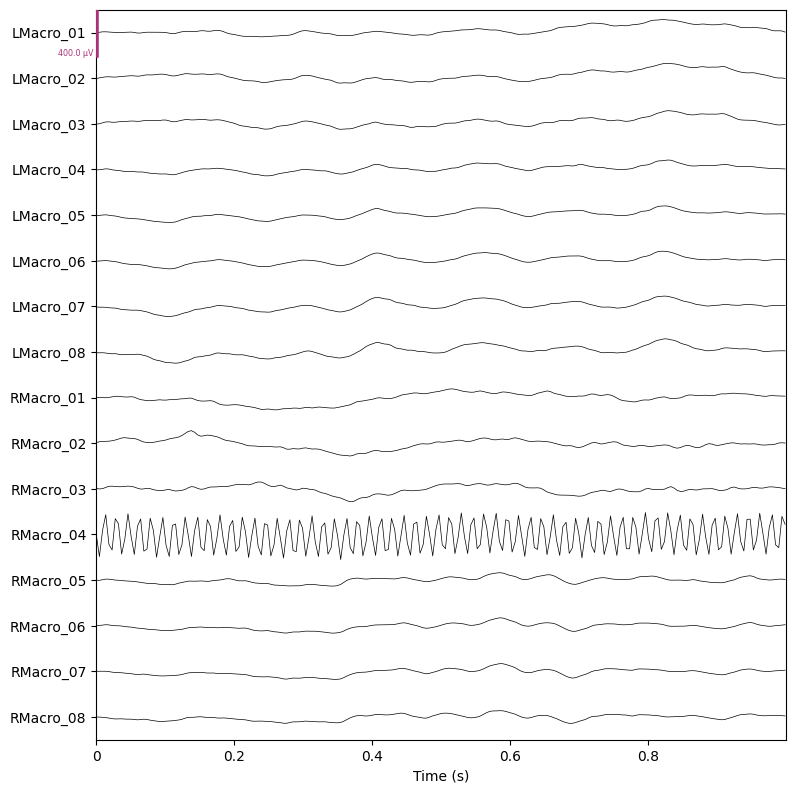


Ictal


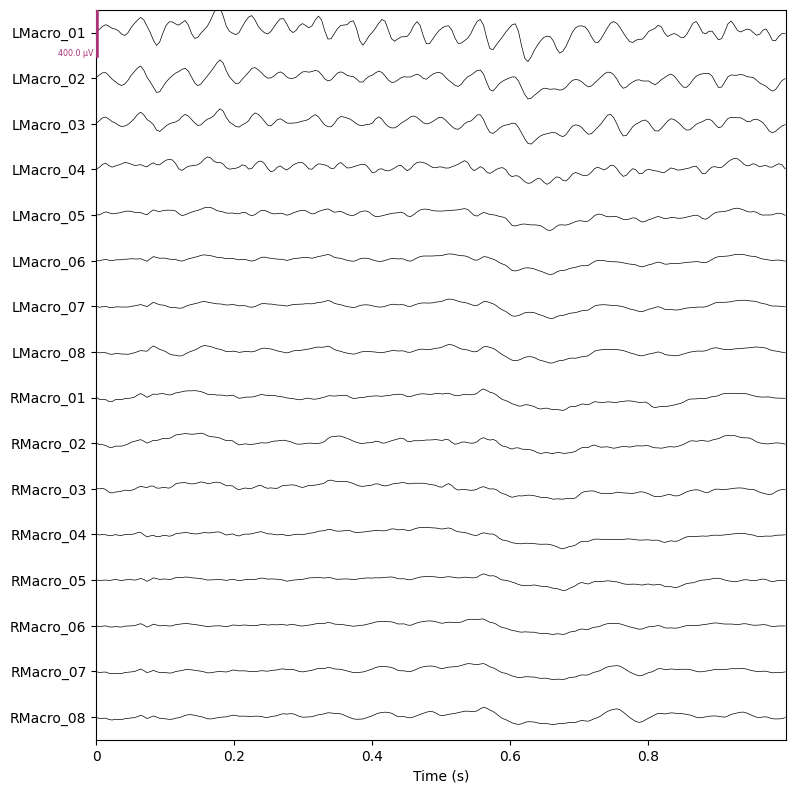

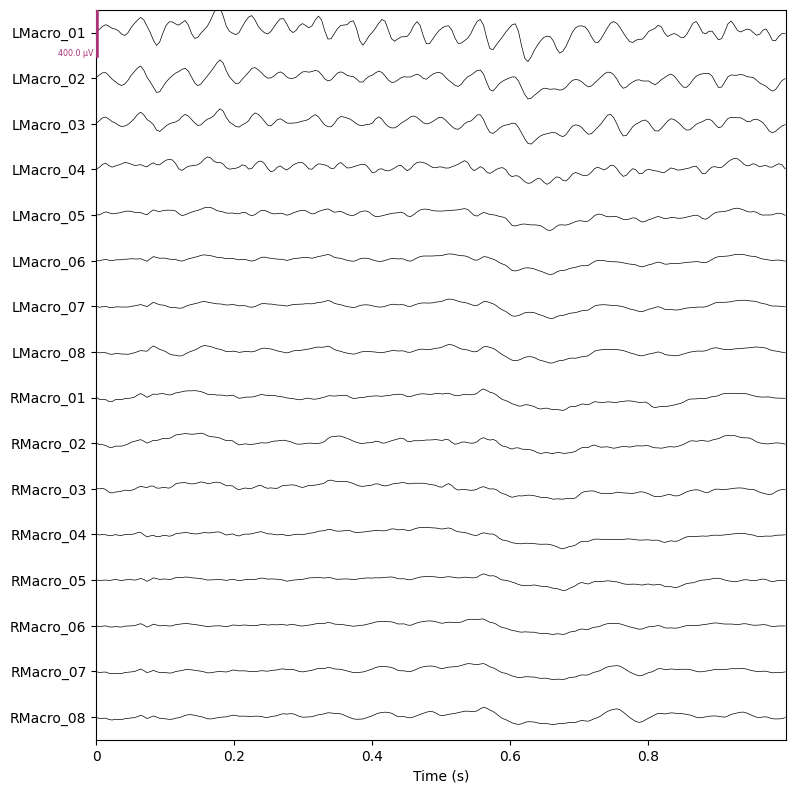

In [5]:
import mne # Import the mne library
from termcolor import colored

# set mne to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns),
                         sfreq=freq,
                         ch_types=['eeg']*data.shape[-1])

  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()

  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)

Printing the number of channels

In [6]:
import pandas as pd

num_channels = len(upenn_seizure_df.columns)
print(f"Number of channels: {num_channels}")

Number of channels: 16


Printing the number of Seizure and Baseline data

In [7]:
import os

def count_seizure_baseline(folder_path):
    """Counts the number of seizure and baseline files in a folder."""
    seizure_count = 0
    baseline_count = 0
    for filename in os.listdir(folder_path):
        if 'ictal' in filename.lower():  # Case-insensitive check for "ictal"
            seizure_count += 1
        elif 'interictal' in filename.lower():  # Case-insensitive check for "interictal"
            baseline_count += 1
    return seizure_count, baseline_count

# Specify the path to the Patient_2 folder
patient2_folder_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2'

# Count the files
seizure_count, baseline_count = count_seizure_baseline(patient2_folder_path)

# Print the results
print(f"Number of seizure files: {seizure_count}")
print(f"Number of baseline files: {baseline_count}")

Number of seizure files: 3141
Number of baseline files: 0


### **Pre-Processing & Feature Engineering**

**Environment Set-up**

In [8]:
!pip install matplotlib pandas==0.23.0
!pip install numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

  Using cached pandas-0.23.0.tar.gz (13.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [32 lines of output]
      <string>:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      C:\Users\HP\AppData\Local\Temp\pip-install-mwlzc1sg\pandas_298bc7f703654b9e95303f855de327ee\versioneer.py:467: SyntaxWarning: invalid escape sequence '\s'
        LONG_VERSION_PY['git'] = '''
      Traceback (most recent call last):
        File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
     


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


FIR filter

Package install

In [10]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

Filtering

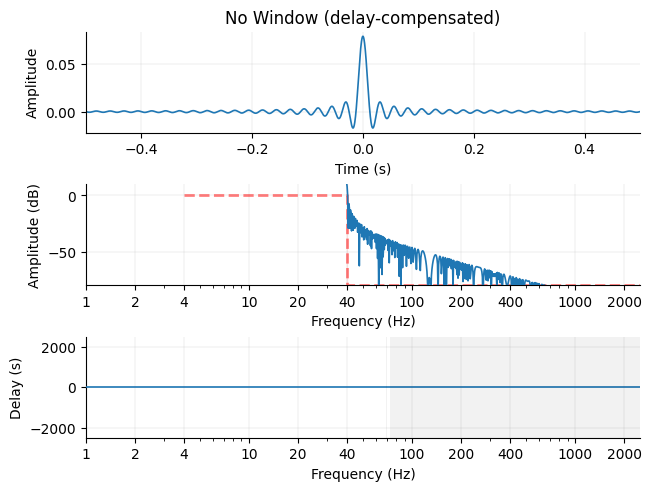

In [11]:
import numpy as np
import pandas as pd
from mne.viz import plot_filter
import matplotlib.pyplot as plt


# Parameters for filter visualization
sfreq = 5000  # Sampling frequency (this should be adapted based on your data)
f_p = 40.  # Pass-band frequency in Hz
nyq = sfreq / 2.  # Nyquist frequency
freq = [0, f_p, f_p, nyq]
gain = [1, 1, 0, 0]

# Filter configuration
n = int(round(1 * sfreq))  # Filter length
n -= n % 2 - 1  # Ensure it's an odd number
t = np.arange(-(n // 2), n // 2 + 1) / sfreq  # Create time array for sinc function
h = np.sinc(2 * f_p * t) / (4 * np.pi)  # Sinc filter

# Frequency limits for plot
flim = (1., sfreq / 2.)

# Plot the filter
fig = plot_filter(h, sfreq, freq, gain, 'No Window', flim=flim, compensate=True)

# Text box with filter details
textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Add text box to the plot
fig.text(0.7, 0.9, textstr, fontsize=14, bbox=props)

# Display the plot
plt.show()

# Save the figure
fig.savefig('ringing_40hz.png')

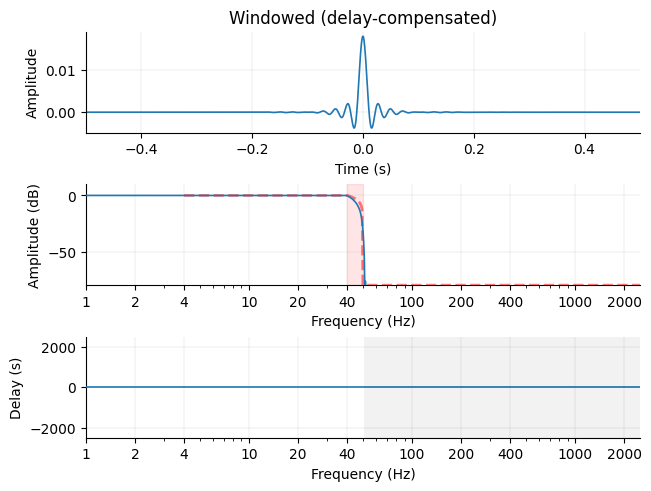

In [13]:
from scipy import signal
trans_bandwidth = 10  # 10 Hz transition band
f_s = f_p + trans_bandwidth

freq = [0., f_p, f_s, nyq]
gain = [1., 1., 0., 0.]
h = signal.firwin2(n, freq, gain, fs=2*nyq)
fig = plot_filter(h, sfreq, freq, gain, 'Windowed',
                  flim=flim, compensate=True)

textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s',
    'Transition Bandwidth: '+str(trans_bandwidth)+' Hz'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.7, 0.88, textstr, fontsize=14, bbox=props)

plt.show()
fig.savefig('no_ringing_40hz.png')

### **Feature Engineering**

In [10]:
import numpy as np
import pandas as pd
from scipy.signal import welch
from pywt import wavedec, swt
import scipy
import sklearn
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
from itertools import combinations
from numpy import inf
import math
from sklearn.preprocessing import StandardScaler

def window(a, w, o, copy = False):
    # if there is no window to be applied
    if w == None:
        view = np.expand_dims(a.T, axis=0)

    # otherwise...
    else:

        sh = (a.size - w + 1, w)
        st = a.strides * 2
        if o:
            view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
        else:
            view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::w]
    if copy:
        return view.copy()
    else:
        return view

def window_y(events, window_size, overlap, target=None, baseline=None):

  # window the data so each row is another epoch
  events_windowed = window(events, w = window_size, o = overlap, copy = True)

  if target:
    # turn to array of bools if seizure in the
    # windowed data
    bools = events_windowed == target
    # are there any seizure seconds in the data?
    data_y = np.any(bools,axis=1)
    # turn to 0's and 1's
    data_y = data_y.astype(int)
    # expand the dimensions so running down one column
    data_y = np.expand_dims(data_y, axis=1)

  elif baseline:
    # replace all baseline labels to nan
    data_y = pd.DataFrame(events_windowed).replace(baseline, np.nan)
    # get the most common other than baseline
    data_y = data_y.mode(1)
    # change nan back to baseline class
    data_y = data_y.fillna(baseline).values
    # if there was nothing but baseline there will be an empty array
    if data_y.size == 0:
        data_y = np.array([baseline]*data_y.shape[0])
        data_y = np.expand_dims(data_y, -1)

  else:
    # get the value most frequent in the window
    data_y = pd.DataFrame(events_windowed).mode(1).values

  return data_y


def bandpower(data, sf, weighted, mean, band):
    low, high = band

    # TODO: Not sure this does much...
    if weighted:
        weighted_window = ('tukey', 3)

    else:
        weighted_window = 'hann'

    # Compute the periodogram (Welch)
    freqs, psd = welch(data,
                       sf,
                       window = weighted_window,
                       nperseg=(2 / low)*sf, # this ensures there are at least 2 cycles of the lowest frequency in the window
                       scaling='density',
                       axis=0
                      )

    # Find closest indices of band in frequency vector
    idx_min = np.argmax(np.round(freqs) > low) - 1
    idx_max = np.argmax(np.round(freqs) > high)

    #select frequencies of interest
    psd = psd[idx_min:idx_max,:]

    if mean:
        psd = np.nanmean(psd,0)
    else:
        psd = np.nanmedian(psd,0)

    return psd


def feature_append(all_features, data, axis=1, expand=True):
    if expand:
        data = np.expand_dims(data, axis=axis)

    # if the feature set is empty
    if all_features.size == 0:
        all_features = data
    else:
        all_features = np.concatenate((all_features, data), axis)

    return all_features


def pad_along_axis(array, target_length, axis=0):

    pad_size = target_length - array.shape[axis]
    axis_nb = len(array.shape)

    if pad_size < 0:
        return array

    npad = [(0, 0) for x in range(axis_nb)]
    npad[axis] = (0, pad_size)

    b = np.pad(array, pad_width=npad, mode='constant', constant_values=0)

    return b


def wavelet_decompose(data, feature_list, channel_name=None, wavelet='db4', wavelet_transform = 'DWT', level=6, scale=False):
    # bool to check if the data has been padded
    padded = False

    if wavelet_transform == 'DWT':
        # get the wavelet coefficients at each level in a list
        coeffs_list = wavedec(data, wavelet=wavelet, level=level)

    elif wavelet_transform == 'UDWT':
        # The signal length along the transformed axis be a multiple of 2**level
        atrous = (2**level)
        orig_shape = data.shape
        ceiled_len = math.ceil(orig_shape[1]/atrous)
        if orig_shape[1]/atrous != ceiled_len:
            padded_len = ceiled_len*atrous
            data = pad_along_axis(data, padded_len, axis=1)
            padded = True
        # get the wavelet coefficients at each level in a list
        coeffs_list = swt(data, wavelet=wavelet, level=level)

    if channel_name:
        # make an empty list for the features later
        feature_names = []

        # make a list of the component names
        nums = list(range(1,level+1))
        names=[]
        for num in nums:
            names.append('D' + str(num))
        # reverse the names so it counts down
        names = names[::-1]

    # make empty arrays to help store data in later
    mean = np.array([])
    std = np.array([])
    LSWT = np.array([])
    mean_abs = np.array([])

    # for each decomposition level from the wavelets...
    for i, array in enumerate(coeffs_list):
        if wavelet_transform == 'DWT':
            # skip the first A
            if i == 0:
                continue
        elif wavelet_transform == 'UDWT':
            # just get the D's
            array = array[1]
            if padded:
                # remove the padding
                array = array[:orig_shape[0],:orig_shape[1]]

        if 'mean' in feature_list:
            # add the data straight into the wavelet_features array
            mean = feature_append(mean, np.mean(array,1))
        if 'std' in feature_list:
            # add the data straight into the wavelet_features array
            std = feature_append(std, np.std(array,1))
        if any(i in ['mean_abs','ratio'] for i in feature_list):
            # add the data into the mean_abs array
            mean_abs = feature_append(mean_abs, np.mean(np.absolute(array),1))
        if 'LSWT' in feature_list:
            # add the data into the LSWT array
            LSWT = feature_append(LSWT, np.sum(array,1))

    wavelet_features = np.array([])
    if 'mean' in feature_list:
        if scale:
            mean = frequency_scale(mean)
        # add the data straight into the wavelet_features array
        wavelet_features = feature_append(wavelet_features, mean, expand=False)
        # add the feature names
        if channel_name:
            feature_names.extend([channel_name+'|'+name+'_mean' for name in names])

    if 'std' in feature_list:
        if scale:
            std = frequency_scale(std)
        # add the data straight into the wavelet_features array
        wavelet_features = feature_append(wavelet_features, std, expand=False)
        # add the feature names
        if channel_name:
            feature_names.extend([channel_name+'|'+name+'_std' for name in names])

    if 'ratio' in feature_list:
        # make an empty df we will put data in
        ratio = np.empty((mean_abs.shape))
        # for each decomposition level
        for level in range(0, mean_abs.shape[1]):
            # for the first level
            if level == 0:
                ratio[:,level] = mean_abs[:,level]/mean_abs[:,level+1]
            # for the last level
            elif level == mean_abs.shape[1]-1:
                ratio[:,level] = mean_abs[:,level]/mean_abs[:,level-1]
            # all other levels
            else:
                mean_levels = (mean_abs[:,level-1]+mean_abs[:,level+1])/2
                ratio[:,level] = mean_abs[:,level]/mean_levels

        if scale:
            ratio = frequency_scale(ratio)
        # concat the ratio
        wavelet_features = feature_append(wavelet_features, ratio, expand=False)
        if channel_name:
            # add to the feature names
            feature_names.extend([channel_name+'|'+name+'_ratio' for name in names])

    if 'mean_abs' in feature_list:
        if scale:
            mean_abs = frequency_scale(mean_abs)
        # now add in the mean_abs to the feature list
        wavelet_features = feature_append(wavelet_features, mean_abs, expand=False)
        if channel_name:
            # add to the feature names
            feature_names.extend([channel_name+'|'+name+'_mean_abs' for name in names])

    if 'LSWT' in feature_list:
        # minus the smallest value from each level for each time
        LSWT = LSWT.T - np.amin(LSWT,1)
        # transpose back
        LSWT = LSWT.T
        # plus 1 to each datapoint
        LSWT = LSWT+1
        # log each level for each time
        LSWT = np.log(LSWT)
        if scale:
            LSWT = frequency_scale(LSWT)
        # append the feature onto the wavelet features
        wavelet_features = feature_append(wavelet_features, LSWT, expand=False)
        if channel_name:
            # add to the feature names
            feature_names.extend([channel_name+'|'+name+'_LSWT' for name in names])

    if channel_name:
        return wavelet_features, feature_names

    else:
        return wavelet_features


def fft(time_data, fft_band):
    def replaceZeroes(data):
        min_nonzero = np.min(data[np.nonzero(data)])
        data[data == 0] = min_nonzero
        return data
    ab_fft = np.absolute(np.fft.rfft(time_data, axis=1)[:,fft_band[0]:fft_band[1]])
    ab_fft = replaceZeroes(ab_fft)
    return np.log10(ab_fft)


def correlation_matrix(data):
    # in the rare case that there is an inf
    # that came from the fft, turn it to a large number
    #data[data == -inf] = np.nan
    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    # scale data across each frequency
    scaled = scaler.fit_transform(data)
    # get the correlation coefficients from a Pearson product-moment (ignore nans)
    return np.ma.corrcoef(scaled)


# We get the eigenvalues and only take the first array out.
# We get the absolute to make them 'real'
def eigen(corr_matrix):
    # in the rare case that there is an inf or nan
    #corr_matrix = np.nan_to_num(corr_matrix)
    eigen_data = np.absolute(np.linalg.eig(corr_matrix)[0])
    # expand and transpose so it becomes columns
    eigen_data = np.expand_dims(eigen_data, axis=1).T

    return eigen_data

# essentially upper_right_triangle from MichaelHills
def corr_reshape(matrix):
    accum = []
    for i in range(matrix.shape[0]):
        # the +1 excludes a channels correlations with itself
        for j in range(i+1, matrix.shape[1]):
            accum.append(matrix[i, j])

    return np.expand_dims(np.array(accum), axis=0)

def entropy(data, feature_list, sf, channel_name=None):
    from entropy.entropy import sample_entropy, spectral_entropy
    entropy_features = np.array([])
    feature_names = []

    # change nans to 0's
    data = np.nan_to_num(data)

    if 'sample_entropy' in feature_list:
        sam_data = np.apply_along_axis(sample_entropy, 1, data)
        sam_data[sam_data == 0] = np.nan
        # now add in the data to the features
        entropy_features = feature_append(entropy_features, sam_data, expand=True)
        if channel_name:
            # add to the feature names
            feature_names.append(channel_name+'|sample_entropy')

    if 'spectral_entropy' in feature_list:
        spec_data = np.apply_along_axis(spectral_entropy, 1, data, sf,
                                        method='welch', nperseg = sf)
        # now add in the data to the features
        entropy_features = feature_append(entropy_features, spec_data, expand=True)
        if channel_name:
            # add to the feature names
            feature_names.append(channel_name+'|spec_entropy')

    if channel_name:
        return entropy_features, feature_names

    else:
        return entropy_features


def frequency_scale(data):
    SS = StandardScaler()
    orig_shape = data.shape
    # shape the data into one row
    data = data.reshape(-1, 1)
    # scale data in respect to all frequencies
    scaled_data = SS.fit_transform(data)
    # shape the data back to before
    scaled_data = scaled_data.reshape(orig_shape)

    return scaled_data
'''
=======================
CLASS: Seizure_Features
=======================

- sf
    - Sampling frequency
- downsample
    - Factor to downsample by
- window_size
    - Seconds(int)/datapoints(float) to epoch the data into
    - Can be None for no epoching
- overlap
    - Seconds(int)/datapoints(float) overlap between windows
    - Default None for no overlap
- weighted
    - If to apply a weighting to the window (default False)
- feature_list
    - list of features to be extracted
        - power:
        - power_ratio:
        - mean:
        - mean_abs:
        - std:
        - ratio:
        - LSWT:
        - fft_eigen:
        - fft_corr:
        - time_corr:
        - time_eigen:
        - sample_entropy: LIMITED IMPLIMENTATION
        - spectral_entropy: LIMITED IMPLIMENTATION
        - wavelet_coherence: NOT YET IMPLIMENTED
- bandpasses
    - list of bandpasses to extract for the power measure
- bandpass_mean
    - whether to take the mean or median of the Welch output
- bandpass_ratios
    - list of bandpasses to get a ratio between
- wavelet
    - type of wavelet to use
- wavelet_transform
    - type of transformation to use ('DWT' or 'UDWT')
- levels
    - how many levels to get from the wavelet transform
- fft_band
    - The fft band used for the fft_corr and fft_eigen methods
- scale
    - Whether to scale the data according to the mean so it has a standard deviation of 1.
    - Features based on frequency will be scaled in respect to each other.
    - If scikitlearn is >= 0.20.0 then you can leave NAN's in for the input if scaling
- target
    - the event target if doing binary classification
    - will override baseline if both provided
- baseline
    - the event target representing the class of least interest
    - if target and baseline both not provided then takes the most common class in window to classify window
'''

class Seizure_Features(BaseEstimator, TransformerMixin):
    def __init__(self,
                 sf,
                 downsample=1,
                 window_size=1,
                 overlap=None,
                 weighted=False,
                 feature_list=['power', 'power_ratio', 'mean', 'mean_abs', 'std',
                               'ratio', 'LSWT', 'fft_corr', 'fft_eigen',
                               'time_corr', 'time_eigen', 'sample_entropy',
                               'spectral_entropy'],
                 bandpasses=[[1,4],[4,8]],
                 bandpass_mean=False,
                 bandpass_ratios=[[[3,12],[2,30]],],
                 wavelet = 'db4',
                 wavelet_transform = 'DWT',
                 levels=6,
                 fft_band=[1,48],
                 scale = False,
                 target=None,
                 baseline=None
                ):
        self.sf = sf
        self.downsample = downsample
        if isinstance(window_size, int):
            self.window_size = window_size*sf
        else:
            self.window_size = window_size
        if isinstance(overlap, int):
            self.overlap = overlap*sf
        else:
            self.overlap = overlap
        self.weighted = weighted
        self.feature_list = feature_list
        self.bandpasses = bandpasses
        self.bandpass_ratios = bandpass_ratios
        self.bandpass_mean = bandpass_mean
        self.wavelet=wavelet
        self.wavelet_transform = wavelet_transform
        self.levels=levels
        self.fft_band = fft_band
        self.target = target
        self.baseline = baseline
        self.scale = scale

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None, channel_names_list=None):
        # create empty arrays
        feature_set = np.array([])
        all_windowed_channels = np.array([])
        # create empty list
        feature_names = []
        # specify types of features
        wav_features = ['mean', 'mean_abs', 'std', 'ratio', 'LSWT']
        eigen_corr_features = ['fft_corr', 'fft_eigen', 'time_corr', 'time_eigen']
        entropy_features = ['app_entropy', 'spectral_entropy']

        # downsample
        X = X[::self.downsample]
        self.sf = self.sf/self.downsample

        # check if any of the rows have all the same number (maybe impedence testing?).
        # This will throw off most of the feature extraction so turn them to nans
        # Cant seem to think of a better way outside of pandas to do this!
        # Also we need to make sure there is more than one channel before doing this!
        if X.shape[1]>1:
          X = pd.DataFrame(X)
          all_same = X.eq(X.iloc[:, 0], axis=0).all(1)
          X.loc[all_same] = np.nan
          X = X.values

        # for each column of the data...
        for j, column in enumerate(X.T):
            # window the data so each row is another epoch
            channel_windowed = window(column, w = self.window_size, o = self.overlap, copy = True)

            # -----
            # POWER
            # -----
            if 'power' in self.feature_list:
                # create an empty array
                welch_data = np.array([])
                # for each bandpass in the bandpasses
                for bandpass in self.bandpasses:
                    # calculate the average or median of the frequency
                    # band for all time points in the channel
                    bandpass_data = bandpower(channel_windowed.T,
                                              sf = self.sf,
                                              weighted= self.weighted,
                                              mean = self.bandpass_mean,
                                              band = bandpass)

                    welch_data = feature_append(welch_data, bandpass_data)

                    # if channel_names were provided...
                    if isinstance(channel_names_list, list):
                        # ...append the channel and frequency band to the list
                        feature_names.append(channel_names_list[j]+'|'+str(bandpass[0])+'_'+str(bandpass[1])+'Hz')

                if self.scale:
                    welch_data = frequency_scale(welch_data)

                # append the data straight into the feature set
                feature_set = feature_append(feature_set, welch_data, expand=False)


            # BANDPASS RATIOS
            if 'power_ratio' in self.feature_list:
                for bandpass_ratio in self.bandpass_ratios:
                    bandpass_1 = bandpower(channel_windowed.T,
                                              sf = self.sf,
                                              weighted= self.weighted,
                                              mean = self.bandpass_mean,
                                              band = bandpass_ratio[0])
                    bandpass_2 = bandpower(channel_windowed.T,
                                              sf = self.sf,
                                              weighted= self.weighted,
                                              mean = self.bandpass_mean,
                                              band = bandpass_ratio[1])
                    # divide bandpass 2 from 1
                    relative_power = bandpass_2/bandpass_1

                    if self.scale:
                        relative_power = frequency_scale(relative_power)

                    # append the data straight into the feature set
                    feature_set = feature_append(feature_set, relative_power)
                    # if channel_names were provided...
                    if isinstance(channel_names_list, list):
                        ratio_str = str(bandpass_ratio[0][0])+'_'+str(bandpass_ratio[0][1])+'/'+str(bandpass_ratio[1][0])+'_'+str(bandpass_ratio[1][1])+'Hz'
                        # ...append the channel and frequency band to the list
                        feature_names.append(channel_names_list[j]+'|Ratio_'+ratio_str)


            # --------
            # WAVELETS
            # --------
            if any(i in wav_features for i in self.feature_list):
                # if channel_names were provided...
                if isinstance(channel_names_list, list):
                    # ... calculate all the requested wavelet features for the channel over
                    # all the epochs
                    wavelet_features, wavelet_feat_names = wavelet_decompose(channel_windowed,
                                                                             self.feature_list,
                                                                             channel_name=channel_names_list[j],
                                                                             wavelet=self.wavelet,
                                                                             wavelet_transform = self.wavelet_transform,
                                                                             level=self.levels,
                                                                             scale = self.scale)
                    # extend the feature list with the wavelet feature list
                    feature_names.extend(wavelet_feat_names)
                else:
                    # this is if we dont have the channel names
                    wavelet_features = wavelet_decompose(channel_windowed,
                                                         self.feature_list,
                                                         wavelet=self.wavelet,
                                                         wavelet_transform = self.wavelet_transform,
                                                         level=self.levels,
                                                         scale = self.scale)

                # append the wavelet feature without expanding the data
                feature_set = feature_append(feature_set, wavelet_features, expand=False)

            # -------
            # Entropy
            # -------
            if 'sample_entropy' in self.feature_list or 'spectral_entropy' in self.feature_list:
                if isinstance(channel_names_list, list):
                    entropy_features, entropy_feat_names = entropy(channel_windowed,
                                                                   self.feature_list,
                                                                   self.sf,
                                                                   channel_name=channel_names_list[j])
                    # extend the feature list with the wavelet feature list
                    feature_names.extend(entropy_feat_names)
                else:
                    entropy_features = entropy(channel_windowed, self.feature_list, self.sf)

                if self.scale:
                    SS = StandardScaler()
                    # scale data for each feature separately
                    entropy_features = SS.fit_transform(entropy_features)
                # append the wavelet feature without expanding the data
                feature_set = feature_append(feature_set, entropy_features, expand=False)

        # ----------
        # EIGEN CORR
        # ----------
            # if any of the correlation or eigenvalue methods have been specified...
            if any(i in eigen_corr_features for i in self.feature_list):
                # append the window data
                all_windowed_channels = feature_append(all_windowed_channels, channel_windowed, axis=2, expand=True)

        # if any of the correlation or eigenvalue methods have been specified...
        if any(i in eigen_corr_features for i in self.feature_list):
            # default bools so only need to check these rather than search
            # through a list each epoch which i assume would take longer?
            bool_dict = {'fft_eigen':False,
                         'fft_corr': False,
                         'time_eigen': False,
                         'time_corr': False}

            if 'fft_corr' in self.feature_list:
                bool_dict['fft_corr'] = True
            if 'fft_eigen' in self.feature_list:
                bool_dict['fft_eigen'] = True
            if 'time_corr' in self.feature_list:
                bool_dict['time_corr'] = True
            if 'time_eigen' in self.feature_list:
                bool_dict['time_eigen'] = True

            # create an empty array
            all_eigen_corr = np.array([])

            # go across epochs so we have channels and a single epoch
            # in the data
            for index, epoch in enumerate(all_windowed_channels):
                # create an empty array
                epoch_eigen_corr = np.array([])
                # for each key in the dictionary
                for key in bool_dict.keys():
                    # check it is activated
                    if bool_dict[key]:
                        # if there are any nans, inf
                        # in the data then we will
                        # just make this feature dataframe full of nan's so it doesnt crash
                        if np.isnan(epoch).any() or np.isinf(epoch).any():
                            if key in ['fft_corr','time_corr']:
                                # get the length of all possible channel combinations plus channels with themselves
                                len_combinations = len(list(combinations(range(epoch.shape[1]), 2)))
                                eigen_corr_data = np.full((1,len_combinations), np.nan)
                            else:
                                eigen_corr_data = np.full((1,epoch.shape[1]), np.nan)

                        # if there are no nans
                        else:
                            if key in ['fft_corr','fft_eigen']:
                                # get the fourier transform data
                                fft_data = fft(epoch.T, self.fft_band)
                                # get correlation matrix of channels over freq
                                corr_matrix = correlation_matrix(fft_data)
                            else:
                                # get correlation matrix of channel over time
                                corr_matrix = correlation_matrix(epoch.T)

                            # for the eigen data
                            if key in ['fft_eigen','time_eigen']:
                                # get absolute eigenvalues
                                eigen_corr_data = eigen(corr_matrix)

                            # for the corr data
                            else:
                                eigen_corr_data = corr_reshape(corr_matrix)

                        # append the epoch feature without expanding the data
                        epoch_eigen_corr = feature_append(epoch_eigen_corr, eigen_corr_data, axis=1, expand=False)

                # append the feature without expanding the data
                all_eigen_corr = feature_append(all_eigen_corr, epoch_eigen_corr, axis=0, expand=False)

            if self.scale:
                SS = StandardScaler()
                # scale data for each feature separately
                all_eigen_corr = SS.fit_transform(all_eigen_corr)
            # append all the eigen_corr data to the main feature set
            feature_set = feature_append(feature_set, all_eigen_corr, axis=1, expand=False)

            # if channel_names were provided...
            if isinstance(channel_names_list, list):
                # append the feature names
                if bool_dict['fft_eigen']:
                    feature_names.extend([channel+'|fft_eigen' for channel in channel_names_list])
                if bool_dict['time_eigen']:
                    feature_names.extend([channel+'|time_eigen' for channel in channel_names_list])
                if bool_dict['fft_corr'] or bool_dict['time_corr']:
                    # get all combinations of channels
                    combinations_list = list(combinations(channel_names_list, 2))
                    # join the channels together
                    corr_comb = ['_'.join(map(str,i)) for i in combinations_list]
                    if bool_dict['fft_corr']:
                        feature_names.extend([channel_comb+'|fft_corr' for channel_comb in corr_comb])
                    if bool_dict['time_corr']:
                        feature_names.extend([channel_comb+'|time_corr' for channel_comb in corr_comb])

        # set feature names as a class attribute
        self.feature_names = feature_names

        # ------
        # DATA Y
        # ------
        # if y is an array
        if type(y).__module__ == np.__name__:
            y = y[::self.downsample]
            data_y = window_y(y, self.window_size, self.overlap, target=self.target, baseline=self.baseline)

            return feature_set, data_y
        else:
            return feature_set

In [11]:
import glob            # for file locations
import pprint          # for pretty printing
import re
from getpass import getpass
import pyedflib
from collections import Counter
from pywt import swt
import math
from bs4 import BeautifulSoup
import sys
import os
from bs4 import BeautifulSoup
import requests
import re
import wget
import zipfile
import pandas as pd     # dataframes
from tqdm import tqdm_notebook as tqdm
from getpass import getpass
import os
from scipy.io import loadmat
import mne
import numpy as np
import tables
import numpy as np
import tables
import os
from urllib.request import urlretrieve
import wfdb
import re
import pandas as pd
import numpy as np
import pyedflib
from sklearn.preprocessing import StandardScaler
from scipy import signal
import sys
import warnings
from tqdm import tqdm_notebook as tqdm

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

In [13]:
def window(a, w, o, copy = False):
  # if there is no window to be applied
  if w == None:
      view = np.expand_dims(a.T, axis=0)

  # otherwise...
  else:
      sh = (a.size - w + 1, w)
      st = a.strides * 2
      if o:
          view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
      else:
          view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::w]
  if copy:
      return view.copy()
  else:
      return view

def window_x(data, window_size, overlap):

  for i, column in enumerate(data.columns):

    # window the data so each row is another epoch
    channel_windowed = window(data[column], w = window_size, o = overlap, copy = True)
    channel_windowed = np.reshape(channel_windowed, (*channel_windowed.shape, -1))

    if i ==0:
      windowed_data = channel_windowed
    else:
      windowed_data = np.concatenate((windowed_data, channel_windowed), axis=-1)

  return windowed_data

In [14]:
import os
import re
import numpy as np
import pandas as pd
from scipy.io import loadmat
import tables
import time
from tqdm.notebook import tqdm  # Use this in Jupyter Notebooks; for standard scripts use 'from tqdm import tqdm'
import mne

# Set MNE to only output warnings
mne.set_log_level('WARNING')

# Function to save to the database (HDF5)
def save_to_database(save_dir, part_id, combined_df, condition):
    with tables.open_file(save_dir, mode="a", title="Patient 2 Features") as h5file:
        if "/" + part_id in h5file:
            part_x_array = h5file.get_node("/" + part_id + '/Data_x')
            part_y_array = h5file.get_node("/" + part_id + '/Data_y')
            data_x_labels = h5file.get_node('/' + part_id + '/Data_x_Feat_Names')
            combined_df = combined_df.reindex(data_x_labels[:].astype(str), axis=1)
        else:
            part_group = h5file.create_group("/", part_id, 'Participant Data')
            x_atom = tables.Atom.from_dtype(combined_df.values.dtype)
            y_atom = tables.Atom.from_dtype(condition.dtype)
            part_x_array = h5file.create_earray("/" + part_id, 'Data_x', x_atom, (0, combined_df.shape[1]), 'Feature Array')
            part_y_array = h5file.create_earray("/" + part_id, 'Data_y', y_atom, (0, 1), 'Events Array')
            h5file.create_array("/" + part_id, 'Data_x_Feat_Names', np.array(combined_df.columns, dtype='unicode'), "Names of Each Feature")
        part_x_array.append(combined_df.values)
        part_y_array.append(condition)
        h5file.flush()

# Function to convert .mat file to DataFrame
def mat_to_df(file_path, output=False):
    mat = loadmat(file_path)
    data = mat['data']
    channels = mat['channels']
    freq = mat['freq'][0]
    channels_list = [channel_array[0] for channel_array in channels[0][0]]
    df = pd.DataFrame(data, index=channels_list).T
    df = df.loc[:, (df != df.iloc[0]).any()]  # Remove constant columns

    if output:
        display(df.head())  # Display head if needed

    return df, freq

# Function to determine file class based on its name
def file_class(file_name):
    if re.findall('interictal', file_name):
        return 0  # Baseline (Interictal)
    elif re.findall('ictal', file_name):
        return 1  # Seizure (Ictal)
    else:
        return 2  # Unknown

# Define the directory containing Patient_2 data (adjust for Windows path)
UPENN_DIR = 'Volumes\Seagate\seizure_detection\competition_data\clips\Patient_2'

# Set path for saving features
UPENN_SAVE_PATH = 'Patient_2_features.h5'

# Remove the file if it exists to start fresh
if os.path.exists(UPENN_SAVE_PATH):
    os.remove(UPENN_SAVE_PATH)

# Function to list files in a directory (adjusted for Windows compatibility)
def file_list(directory, output=False):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.mat')]

# Get the list of Patient_2 files
part_id = 'Patient_2'
part_file_list = file_list(UPENN_DIR)

# Start processing files in the Patient_2 folder
for file in tqdm(part_file_list, desc='Patient_2 Files'):
    df, freq = mat_to_df(file)
    class_name = file_class(file)

    feat = Seizure_Features(sf=freq,
                            window_size=None,
                            bandpasses=[[2, 4], [4, 8], [8, 12], [12, 30], [30, 70]],
                            feature_list=['power', 'power_ratio', 'mean', 'mean_abs',
                                          'std', 'ratio', 'LSWT', 'fft_corr', 'fft_eigen',
                                          'time_corr', 'time_eigen'])

    part_x_feat = feat.transform(df.values, channel_names_list=list(df.columns))
    part_x_feat = pd.DataFrame(part_x_feat, columns=feat.feature_names)

    part_y_feat = np.expand_dims(np.array([class_name]), axis=1)

    # Save the extracted features to the database
    save_to_database(UPENN_SAVE_PATH, part_id, part_x_feat, part_y_feat)

<>:58: SyntaxWarning: invalid escape sequence '\S'
<>:58: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP\AppData\Local\Temp\ipykernel_41856\1349888248.py:58: SyntaxWarning: invalid escape sequence '\S'
  UPENN_DIR = 'Volumes\Seagate\seizure_detection\competition_data\clips\Patient_2'


Patient_2 Files:   0%|          | 0/7035 [00:00<?, ?it/s]

In [15]:
import tables
import pandas as pd

def h5_to_csv(h5_file_path, output_csv_path):
    # Open the HDF5 file
    with tables.open_file(h5_file_path, mode="r") as h5file:
        # Initialize an empty DataFrame to collect the data
        all_data = pd.DataFrame()

        # Iterate over each participant's data group in the HDF5 file
        for part in h5file.root:
            # Extract features (Data_x) and labels (Data_y) for each participant
            data_x = part.Data_x.read()  # Extract feature data
            data_y = part.Data_y.read()  # Extract label data (conditions)

            # Convert the feature names to a list
            feature_names = h5file.get_node(f'/{part._v_name}/Data_x_Feat_Names').read().astype(str)

            # Create a DataFrame for the feature data and label
            part_df = pd.DataFrame(data_x, columns=feature_names)
            part_df['Label'] = data_y  # Add the labels as a new column

            # Add participant ID as a column for clarity
            part_df['Participant_ID'] = part._v_name

            # Concatenate all participant data into one DataFrame
            all_data = pd.concat([all_data, part_df], ignore_index=True)

    # Write the full DataFrame to a CSV file
    all_data.to_csv(output_csv_path, index=False)
    print(f"Data has been successfully saved to {output_csv_path}")

# Specify the path to the HDF5 file and the desired CSV output path
h5_file_path = 'Patient_2_features.h5'
output_csv_path = 'Patient_2_features.csv'

# Convert the HDF5 file to CSV
h5_to_csv(h5_file_path, output_csv_path)

# The print statement should be outside the function definition
csv_data = pd.read_csv(output_csv_path)
print(csv_data)

Data has been successfully saved to Patient_2_features.csv
      LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
0          227.771604       121.729376        104.748192          12.558394   
1          162.957202        77.334727         39.298664         159.289935   
2            7.328949        42.812358         74.461760          98.214038   
3          213.279844        85.966538         48.585487         241.390643   
4           44.163924        27.442250         42.136054         177.165579   
...               ...              ...               ...                ...   
7030         6.511542        41.123485         24.805929           3.913371   
7031       363.795524        34.451151         32.221449           2.242655   
7032        42.185306        16.288603         13.745217           1.414532   
7033       383.548524      2478.483470       2292.985847         812.322753   
7034        41.703304        20.128222          9.143991           2.347

In [17]:
import tables
import pandas as pd

# Path to the HDF5 file
h5file_path = 'Patient_2_features.h5'

# Open the HDF5 file
with tables.open_file(h5file_path, mode="r") as h5file:
    # Access the data, labels, and feature names for Patient_2
    data_x = h5file.get_node('/Patient_2/Data_x')
    data_y = h5file.get_node('/Patient_2/Data_y')
    data_x_labels = h5file.get_node('/Patient_2/Data_x_Feat_Names')

    # Create a DataFrame from the data and labels
    part_feature_df = pd.DataFrame(data_x[:], columns=data_x_labels[:].astype(str))
    part_feature_df['class'] = data_y[:]

    # Set the class column as the index
    part_feature_df = part_feature_df.set_index('class')

    # Print the first few rows of the DataFrame
    print(part_feature_df.head())

       LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
class                                                                          
1           227.771604       121.729376        104.748192          12.558394   
1           162.957202        77.334727         39.298664         159.289935   
1             7.328949        42.812358         74.461760          98.214038   
1           213.279844        85.966538         48.585487         241.390643   
1            44.163924        27.442250         42.136054         177.165579   

       LMacro_01|30_70Hz  LMacro_01|Ratio_3_12/2_30Hz  LMacro_01|D6_mean  \
class                                                                      
1               0.647189                     0.236310          -1.464481   
1              17.511810                     0.521757          -0.524147   
1               8.702826                     0.631694           4.117210   
1              19.657826                     1.773919      

In [18]:
part_feature_df.index.value_counts()

class
2    3894
0    2990
1     151
Name: count, dtype: int64

In [19]:
reduced_features = part_feature_df.loc[[0,1]]
reduced_features.head()

,LMacro_01|2_4Hz,LMacro_01|4_8Hz,LMacro_01|8_12Hz,LMacro_01|12_30Hz,LMacro_01|30_70Hz,LMacro_01|Ratio_3_12/2_30Hz,LMacro_01|D6_mean,LMacro_01|D5_mean,LMacro_01|D4_mean,LMacro_01|D3_mean,...,RMacro_04_RMacro_05|time_corr,RMacro_04_RMacro_06|time_corr,RMacro_04_RMacro_07|time_corr,RMacro_04_RMacro_08|time_corr,RMacro_05_RMacro_06|time_corr,RMacro_05_RMacro_07|time_corr,RMacro_05_RMacro_08|time_corr,RMacro_06_RMacro_07|time_corr,RMacro_06_RMacro_08|time_corr,RMacro_07_RMacro_08|time_corr
class,,,,,,,,,,,,,,,,,,,,,
0,114.541010,26.387061,11.821119,1.357175,0.127231,0.080726,-0.128602,0.118216,-0.101168,-0.033279,...,-0.303116,-0.431413,-0.376480,-0.411506,0.544665,0.179166,0.469152,0.890269,0.827349,0.822477
0,27.574621,43.245174,18.910574,0.791160,0.113143,0.028620,-0.566416,-0.064466,-0.082230,0.007399,...,-0.427137,-0.388867,-0.327155,-0.370580,0.750489,0.593814,0.665086,0.956724,0.870345,0.912751
0,58.207500,18.142876,8.238157,1.537487,0.341276,0.179073,0.500630,-0.156088,0.016892,0.061672,...,0.121037,0.126031,0.092073,-0.025342,0.779517,0.483535,0.452129,0.887166,0.724896,0.718923
0,142.960698,11.285728,13.005110,1.014406,0.283393,0.118613,-0.823890,0.296830,0.030066,-0.039112,...,0.119059,0.116303,0.282626,0.113695,0.737446,0.529281,0.288499,0.719412,0.648070,0.786587
0,221.105230,39.302649,28.439736,3.143172,0.317358,0.072439,0.119001,0.103982,-0.235290,-0.002702,...,-0.272180,0.054720,-0.089779,0.077794,0.721609,0.470620,0.344036,0.810304,0.774646,0.820247


In [20]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.1
RANDOM_STATE = 0

# turn to numpy array
data_x = reduced_features.values

# create condition(group) array
data_y = reduced_features.index.values

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(2543, 848) (283, 848) (315, 848)
(2543,) (283,) (315,)


In [21]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.1

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

print(color.BOLD+color.UNDERLINE+'Feature DataFrame'+color.END)
print('Training size: ' + str(X_train.shape))
print('Validation size: ' + str(X_val.shape))
print('Test size: ' + str(X_test.shape))
print(color.BOLD+color.UNDERLINE+'\nTarget DataFrame'+color.END)
print('Training size: ' + str(y_train.shape))
print('Validation size: ' + str(y_val.shape))
print('Test size: ' + str(y_test.shape))

Feature DataFrame
Training size: (2543, 848)
Validation size: (283, 848)
Test size: (315, 848)

Target DataFrame
Training size: (2543,)
Validation size: (283,)
Test size: (315,)


In [23]:
def get_proportions(data):

    counts = pd.DataFrame(np.unique(data, return_counts=True), index = ['Class_ID', 'Counts']).T
    counts['Percent'] = (counts['Counts']/counts['Counts'].sum()).round(2)*100
    counts = counts.set_index('Class_ID')
    return counts


print(color.BOLD+color.UNDERLINE+'Training DataFrame'+color.END)
display(get_proportions(y_train))
print(color.BOLD+color.UNDERLINE+'\nTest DataFrame'+color.END)
display(get_proportions(y_test))

Training DataFrame


,Counts,Percent
Class_ID,,
0,2412,95.0
1,131,5.0



Test DataFrame


,Counts,Percent
Class_ID,,
0,308,98.0
1,7,2.0


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your training data and 'reduced_features' is your DataFrame
# containing features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train) # Scale X_train and assign it to X_train_scale

x_axis_label = 'LMacro_03|D4_ratio'
y_axis_label = 'LMacro_03|D2_ratio'

# Define feature_list using the columns of reduced_features DataFrame
feature_list = reduced_features.columns.tolist()

# Now you can use X_train_scale and feature_list
reduced_array = X_train_scale[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]
reduced_df = pd.DataFrame(reduced_array, columns=[x_axis_label, y_axis_label])

reduced_df.head()

,LMacro_03|D4_ratio,LMacro_03|D2_ratio
0,-0.299454,0.829181
1,0.153427,-0.357728
2,0.749223,-1.195375
3,1.040002,-0.645158
4,0.225496,-0.972399


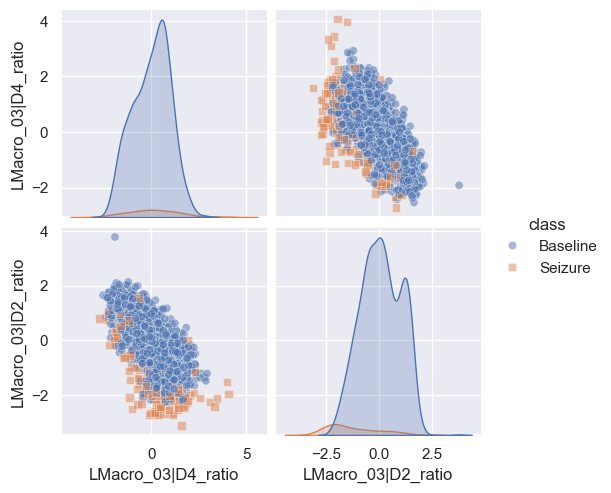

In [28]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

def plot_pairplot(data_x, data_y):

    data_plot = data_x.copy()
    data_plot['class'] = np.vectorize({0:'Baseline', 1:'Seizure'}.get)(data_y)
    sns.pairplot(data_plot,
                 hue = 'class',
                 hue_order = ['Baseline','Seizure'],
                 markers=["o", "s"],
                 plot_kws=dict(alpha = 0.5))
    plt.show()

plot_pairplot(reduced_df, y_train)

Before Resample
Counter({np.int64(0): 2412, np.int64(1): 131})


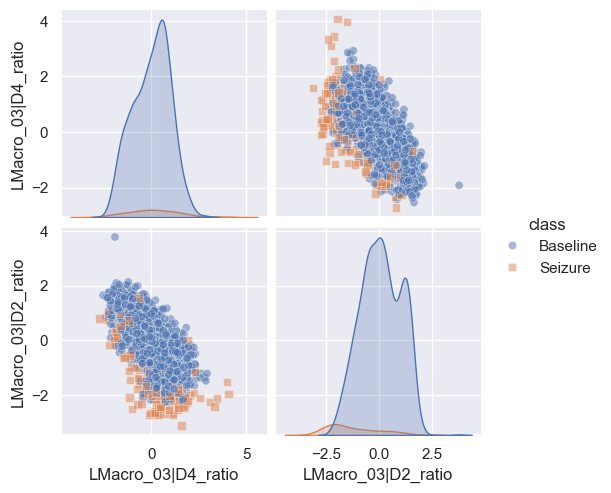

After Resample
Counter({np.int64(1): 131, np.int64(0): 131})


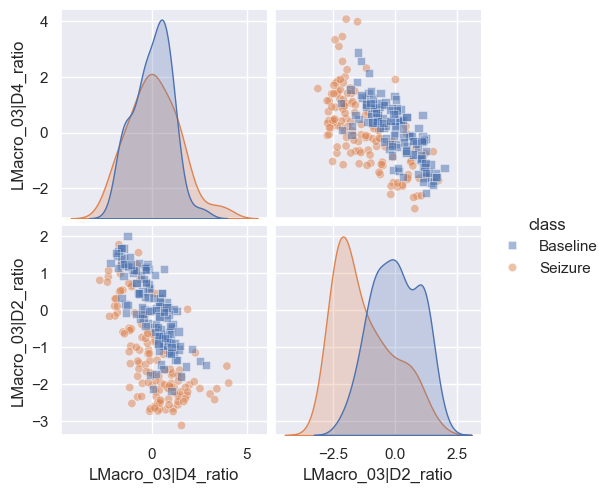

In [29]:
from sklearn.utils import resample
from collections import Counter

print(color.UNDERLINE + 'Before Resample' + color.END)
print(Counter(y_train))
plot_pairplot(reduced_df, y_train)

print(color.UNDERLINE + 'After Resample' + color.END)
data_x_downsampled, data_y_downsampled = resample(reduced_df[y_train == 0],
                                                  y_train[y_train == 0],
                                                  replace=True,
                                                  n_samples=reduced_df[y_train == 1].shape[0],
                                                  random_state=123)

data_x_bal = np.vstack((reduced_df[y_train == 1], data_x_downsampled))
data_y_bal = np.hstack((y_train[y_train == 1], data_y_downsampled))
print(Counter(data_y_bal))

plot_pairplot(pd.DataFrame(data_x_bal, columns = reduced_df.columns),
              pd.DataFrame(data_y_bal))

Before Resample
Counter({np.int64(0): 2412, np.int64(1): 131})


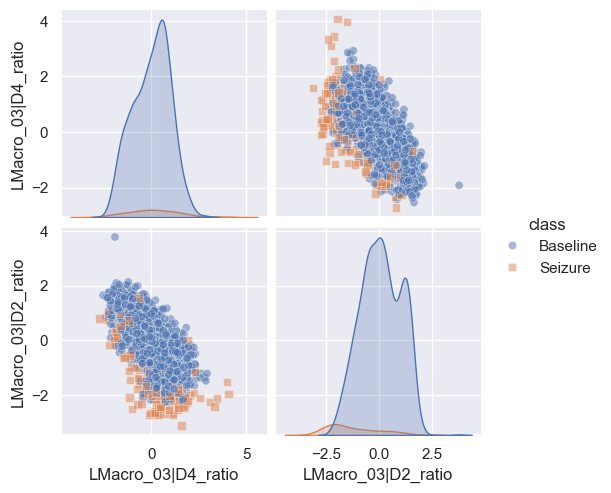

After Resample
Counter({np.int64(0): 131, np.int64(1): 131})


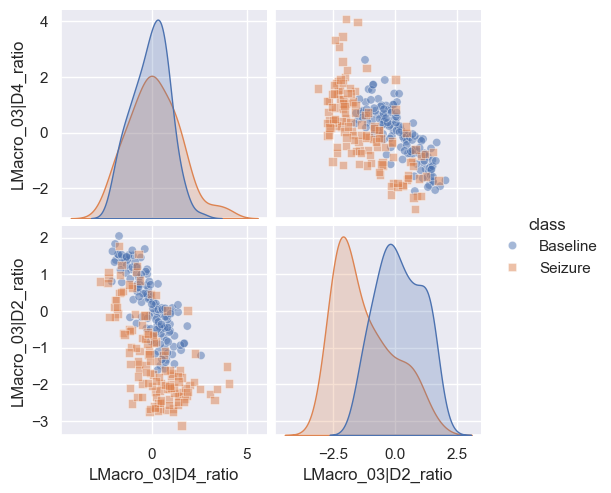

In [30]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def imblearn_sample(sampler, data_x, data_y):

    print(color.UNDERLINE + 'Before Resample' + color.END)
    print(Counter(data_y))
    plot_pairplot(data_x, data_y)

    print(color.UNDERLINE + 'After Resample' + color.END)
    data_x_downsampled, data_y_downsampled = sampler.fit_resample(data_x,
                                                                data_y)
    print(Counter(data_y_downsampled))

    plot_pairplot(pd.DataFrame(data_x_downsampled, columns = data_x.columns),
                  pd.DataFrame(data_y_downsampled))

imblearn_sample(RandomUnderSampler(random_state=123), reduced_df, y_train)

Before Resample
Counter({np.int64(0): 2412, np.int64(1): 131})


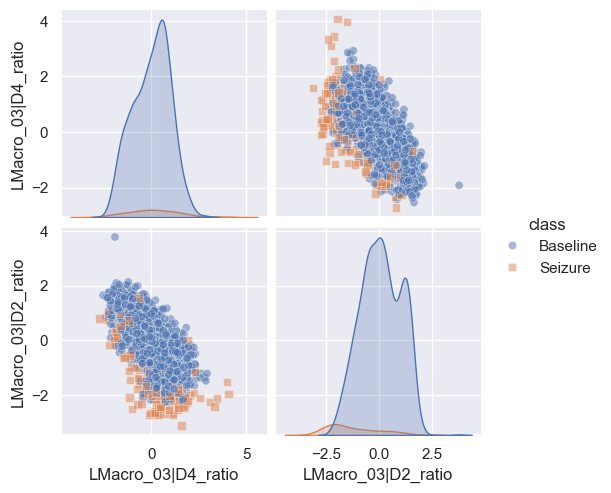

After Resample
Counter({np.int64(0): 2412, np.int64(1): 2412})


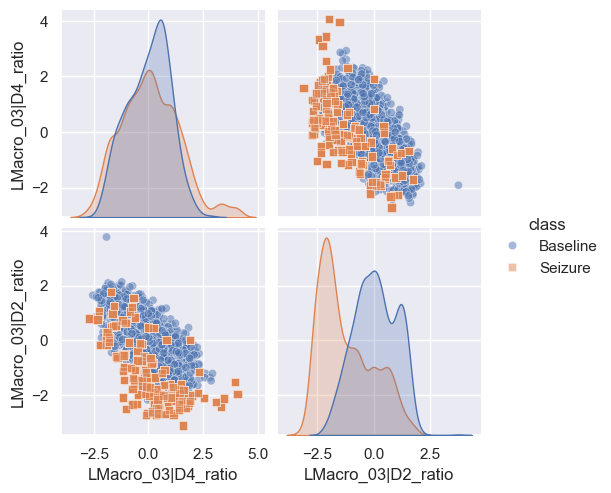

In [31]:
from imblearn.over_sampling import RandomOverSampler

imblearn_sample(RandomOverSampler(random_state=123), reduced_df, y_train)

SMOTE
Before Resample
Counter({np.int64(0): 2412, np.int64(1): 131})


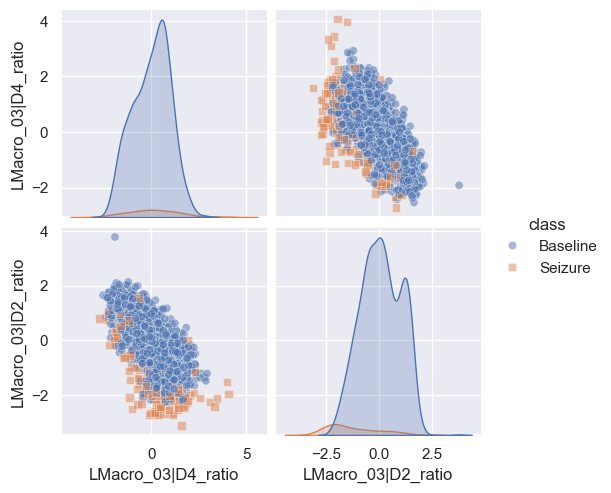

After Resample
Counter({np.int64(0): 2412, np.int64(1): 2412})


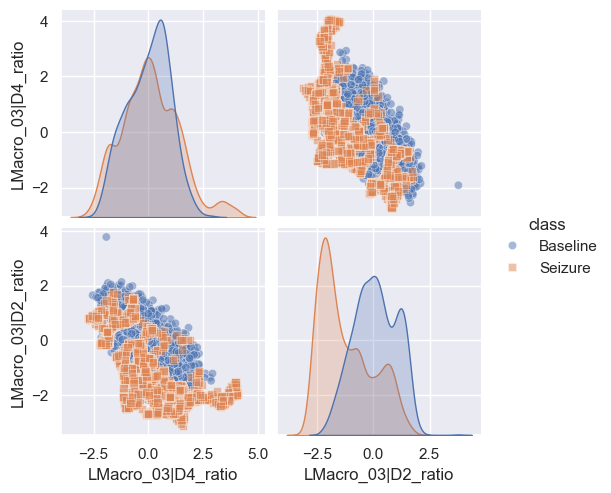

ADASYN
Before Resample
Counter({np.int64(0): 2412, np.int64(1): 131})


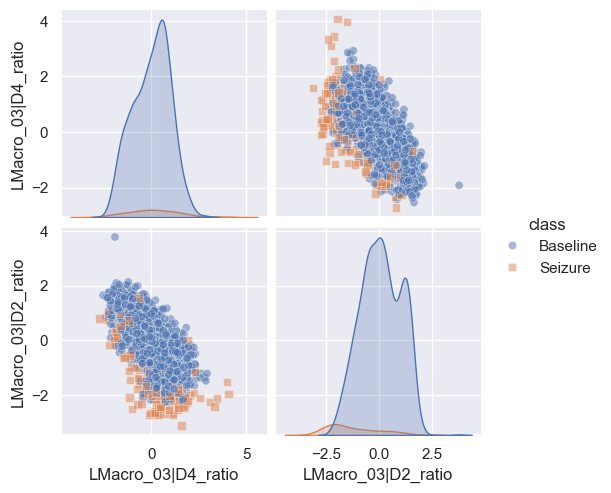

After Resample
Counter({np.int64(0): 2412, np.int64(1): 2408})


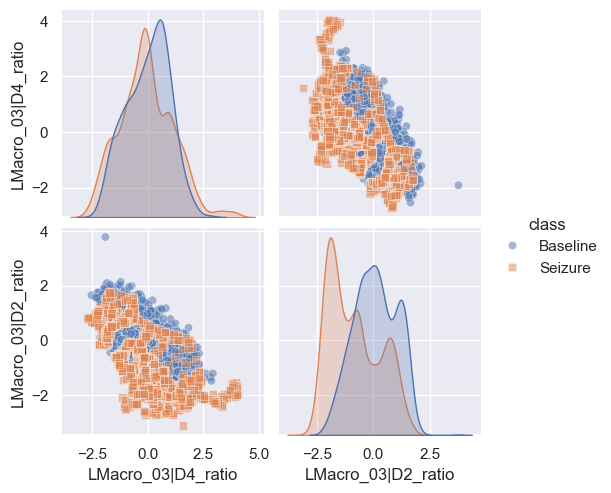

SMOTE with Edited Nearest Neighbor
Before Resample
Counter({np.int64(0): 2412, np.int64(1): 131})


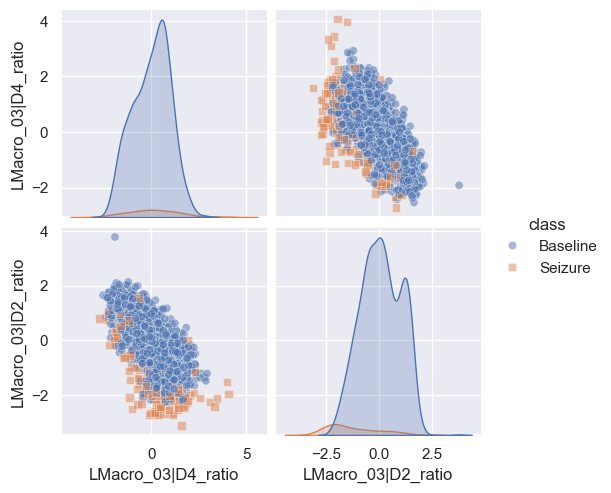

After Resample
Counter({np.int64(1): 1928, np.int64(0): 1867})


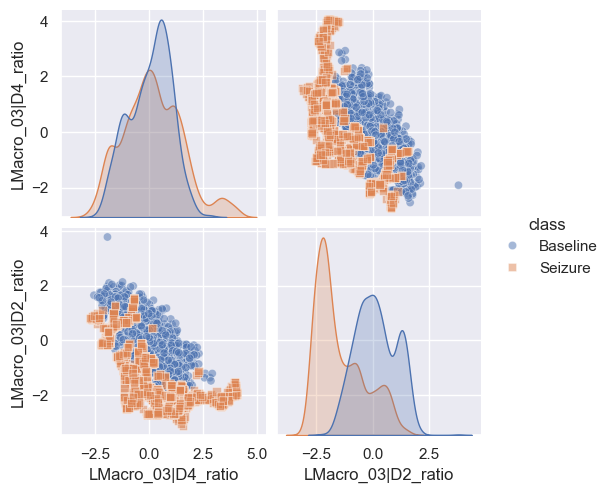

SMOTE with Tomek links
Before Resample
Counter({np.int64(0): 2412, np.int64(1): 131})


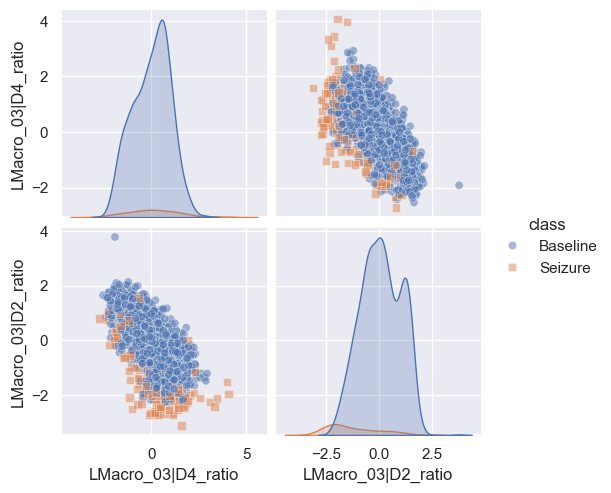

After Resample
Counter({np.int64(0): 2283, np.int64(1): 2283})


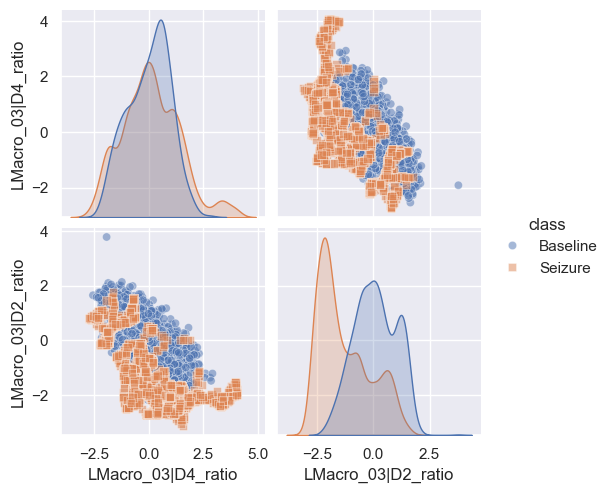

In [32]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

print(color.BOLD+color.UNDERLINE+'SMOTE'+color.END)
imblearn_sample(SMOTE(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'ADASYN'+color.END)
imblearn_sample(ADASYN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Edited Nearest Neighbor'+color.END)
imblearn_sample(SMOTEENN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Tomek links'+color.END)
imblearn_sample(SMOTETomek(random_state=123), reduced_df, y_train)

Binary Classification

Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=100.,
                         solver='liblinear',
                         random_state=RANDOM_STATE)

reg.fit(X_train_scale, y_train)

LogisticRegression(C=100.0, random_state=0, solver='liblinear')

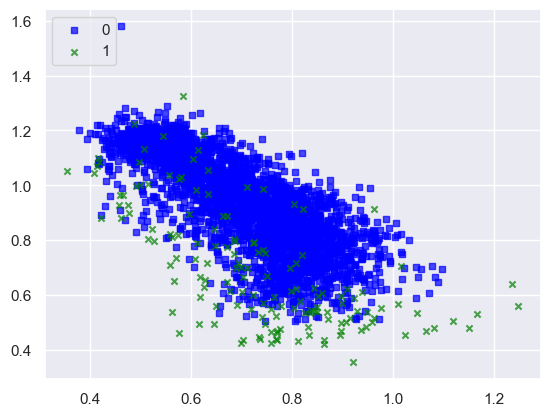

In [34]:
from mlxtend.plotting import category_scatter

x_axis_label = 'LMacro_03|D4_ratio'
y_axis_label = 'LMacro_03|D2_ratio'

reduced_features_reset = reduced_features.reset_index()

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class',
                     data=reduced_features_reset, legend_loc='upper left')

feature_list = list(reduced_features.columns)
vis_data = X_train_scale[:,[feature_list.index(x_axis_label),
                          feature_list.index(y_axis_label)]]

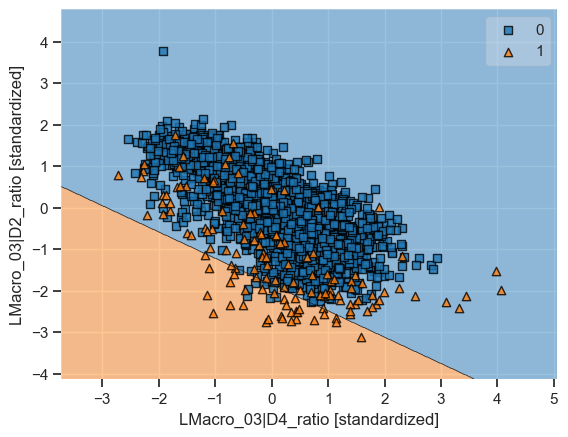

In [35]:
from mlxtend.plotting import plot_decision_regions

reg.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = reg)

plt.xlabel(x_axis_label + ' [standardized]')
plt.ylabel(y_axis_label + ' [standardized]')
plt.show()

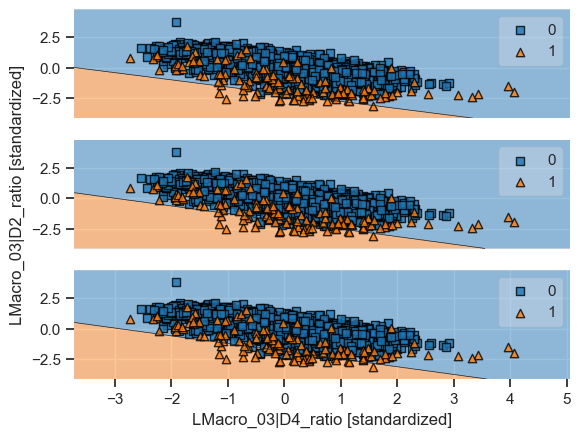

In [36]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)

for i, c in enumerate([0.1, 1, 10]):
    reg = LogisticRegression(C=c, solver='liblinear',random_state=RANDOM_STATE)

    reg.fit(vis_data, y_train)

    plot_decision_regions(vis_data,
                          y_train,
                          clf = reg,
                          ax = axes[i])
    axes[i].get_xaxis().set_visible(False)

axes[2].get_xaxis().set_visible(True)
plt.xlabel(x_axis_label + ' [standardized]')
axes[1].set_ylabel(y_axis_label + ' [standardized]')
plt.savefig('log_change_reg.png')
plt.show()

In [37]:
from sklearn.pipeline import Pipeline

pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(C=100,
                                                solver='liblinear',
                                                class_weight='balanced',
                                                random_state=RANDOM_STATE))])

pipe_reg

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 LogisticRegression(C=100, class_weight='balanced',
                                    random_state=0, solver='liblinear'))])

In [38]:
pipe_reg.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_reg.score(X_val, y_val))

Validation Accuracy: 0.989


In [39]:
log_predicted = pipe_reg.predict(X_val)
log_predicted

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [40]:
y_val

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Support Vector Machine (SVM)

In [41]:
from sklearn.svm import SVC

pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(C=100,
                                        kernel='linear',
                                        class_weight = 'balanced',
                                        random_state=RANDOM_STATE))])

pipe_svc_linear

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 SVC(C=100, class_weight='balanced', kernel='linear',
                     random_state=0))])

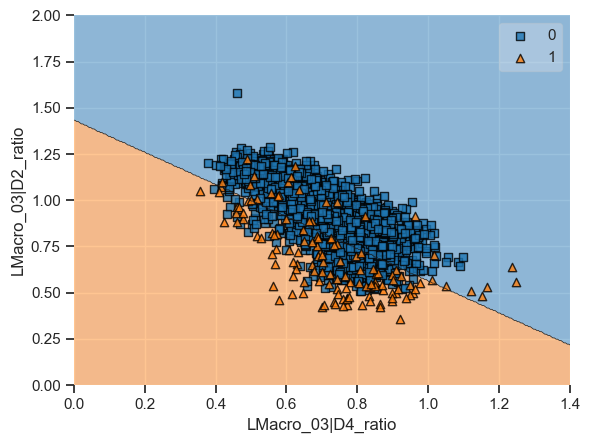

In [42]:
from mlxtend.plotting import plot_decision_regions

vis_data = X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

pipe_svc_linear.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_linear)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,1.4)
plt.ylim(0,2)

plt.savefig('svm_linear_boundary.png')
plt.show()

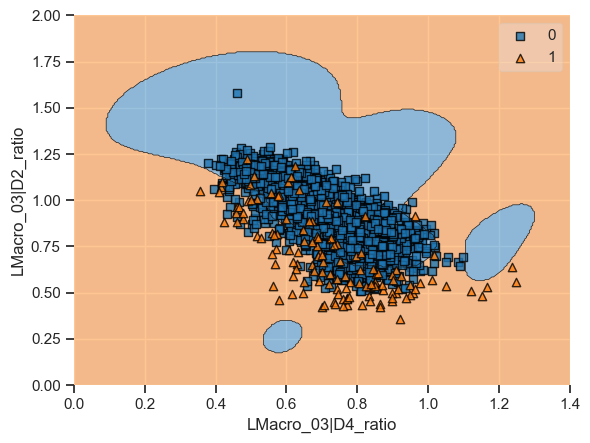

In [43]:
pipe_svc_rbf = Pipeline([('scl', StandardScaler()),
                         ('clf', SVC(C=100,
                                     kernel='rbf',
                                     class_weight = 'balanced',
                                     random_state=RANDOM_STATE))])

pipe_svc_rbf.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_rbf)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,1.4)
plt.ylim(0,2)

plt.savefig('svm_rbf_boundary.png')
plt.show()

In [44]:
pipe_svc_rbf.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_svc_rbf.score(X_val, y_val))

Validation Accuracy: 0.993


Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = 1,
                            random_state=RANDOM_STATE)

DT

DecisionTreeClassifier(max_depth=1, random_state=0)

In [78]:
pip install --upgrade pip



   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 670.4 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 817.9 kB/s eta 0:00:02
   ----------------------- ---------------- 1.0/1.8 MB 868.0 kB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 868.0 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 907.1 kB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 882.6 kB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 891.5 kB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [51]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import graphviz

DT.fit(vis_data, y_train)

class_names = [str(name) for name in list(set(y_train))]

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=[x_axis_label, y_axis_label],
                     class_names=class_names,
                     filled=True, rounded=True,
                     special_characters=True)

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('binary_split.png')

# Show it
graphviz.Source(dot_data)

InvocationException: GraphViz's executables not found